# **Hypothesis Validation**

## Objectives

This hypothesis analysis aims to explore critical climate relationships by testing three evidence-based assumptions. The primary objective is to evaluate whether these hypotheses hold true or can be rejected from a statistical standpoint using empirical data supported by visualisation. 
Specifically, the analysis investigates whether **higher renewable energy adoption and improved energy efficiency are associated with lower CO₂ emissions per capita**, and whether **a tipping point exists around 30% renewable energy share beyond which emission reductions accelerate**. These insights contribute to a clearer understanding of decarbonisation pathways and support data-informed climate policy decisions.

<br>

*Disclaimer: Some of the code snippets in this project were created or refined with the assistance of ChatGPT to support learning and exploration.*

---

In [2]:
# import libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy.stats import spearmanr

In [3]:
# load the dataset
df= pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')
df.head()

,country,year,elec_access_pct,clean_fuels_access_pct,renew_cap_kw_pc,climate_finance_usd,renewables_share_pct,fossil_elec_twh,nuclear_elec_twh,renew_elec_twh,...,region_miss,subregion_miss,co2_per_capita_t,log_co2_per_capita_t,log_renewables_share_pct,log_energy_intensity_mj_usd,log_gdp_pc_usd,above_30_pct,year_offset,renewables_3yr_avg
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,0,0,0.037754,0.037059,3.828424,0.970779,5.195324,1,0,44.990000
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,0,0,0.035988,0.035356,3.841601,1.007958,5.195324,1,1,45.295000
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,0,0,0.048180,0.047055,3.659193,0.875469,5.195324,1,2,42.806667
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,0,0,0.053666,0.052276,3.628599,0.875469,5.255847,1,3,40.030000
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,0,0,0.043717,0.042788,3.811982,0.788457,5.358387,1,4,39.576667


## **Hypothesis 1 Validation:**

**H1:  Renewables Share vs CO₂ - Higher renewables share is associated with lower CO₂ per capita**

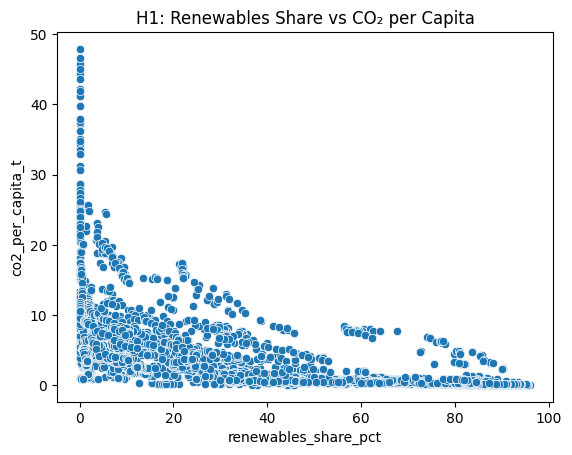

In [4]:
# Analyse H1 # Renewables Share vs CO2
# H1: Visualising distributions and Outliers 
 
import seaborn as sns
import matplotlib.pyplot as plt

# H1: Renewables Share vs CO2
sns.scatterplot(data=df, x='renewables_share_pct', y='co2_per_capita_t')
plt.title('H1: Renewables Share vs CO₂ per Capita')
plt.show()

### **Validating H1 Using Spearman Correlation and OLS Regression**

This analysis tests whether higher renewable energy adoption is associated with lower CO₂ emissions per capita.  
Spearman correlation is used for robustness to non-normality, and OLS regression is applied for interpretability.


**Hypotheses:**

- **Null hypothesis (H₀):** There is no significant relationship between the share of renewables and CO₂ emissions per capita.  
- **Alternative hypothesis (H₁):** Countries with a higher share of renewables have significantly lower CO₂ emissions per capita.

In [5]:
# Validate H1: Higher renewables share is associated with lower CO₂ per capita

# Spearman correlation:
h1_data = df[['renewables_share_pct', 'co2_per_capita_t']].dropna()
corr, pval = spearmanr(h1_data['renewables_share_pct'], h1_data['co2_per_capita_t'])

# OLS Regression:
h1_model = ols('co2_per_capita_t ~ renewables_share_pct', data=h1_data).fit()
h1_summary = h1_model.summary() 

corr, pval, h1_summary



(-0.8050152741281514,
 0.0,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       co2_per_capita_t   R-squared:                       0.319
 Model:                            OLS   Adj. R-squared:                  0.318
 Method:                 Least Squares   F-statistic:                     1596.
 Date:                Tue, 22 Jul 2025   Prob (F-statistic):          9.38e-287
 Time:                        09:51:46   Log-Likelihood:                -10279.
 No. Observations:                3417   AIC:                         2.056e+04
 Df Residuals:                    3415   BIC:                         2.057e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------


### **Results Interpretation**


**1. Spearman Correlation :**

- **Spearman correlation (ρ):** –0.805  
- **p-value:** 0.0 (highly significant)


A Spearman correlation of –0.805 indicates a very strong negative monotonic relationship between renewables share and CO₂ emissions per capita.

- As the percentage of renewables increases, CO₂ per person tends to decrease.
- The p-value confirms this relationship is statistically significant (p < 0.001).

<br>


**2. OLS Linear Regression Summary:**

| Metric                        | Value   |
|-------------------------------|---------|
| Intercept                     | 8.4363  |
| Coef. (Renewables Share)      | –0.1117 |
| p-value (coefficient)         | < 0.001 |
| R-squared                     | 0.319   |
| F-statistic                   | 1596    |
| No. of Observations           | 3417    |

<br>

- The coefficient for `renewables_share_pct` is **–0.1117**  
  This means that for **each 1% increase in renewable energy share**, **CO₂ per capita decreases by approximately 0.11 tonnes** on average.
- The **p-value is < 0.001**, so this result is statistically significant.
- The **R² = 0.319** indicates that **approximately 32%** of the variation in CO₂ emissions per capita is explained by renewables share alone, a strong result for a single-variable model.


**Residual Diagnostics**

- Skew = 2.772  Right-skewed distribution, suggesting a few high-emission outliers  
- Kurtosis = 15.974  Heavy-tailed distribution. Normal distribution has kurtosis ≈ 3 indicating tightly clustered data with extreme values
- More countries are tightly clustered near the mean (high peak)
- Extreme outliers are also more common (heavy tails)
- Residual diagnostics confirmed evident outliers in the scatterplots


Both Spearman correlation and OLS regression strongly support the hypothesis:
**Countries with higher renewable energy shares tend to have significantly lower CO₂ emissions per capita.**

Due to the residuals deviate from normality, which may affect regression assumptions. A log transformation of CO₂ analysis will be carried out in the next step.





**Residual Diagnostics: Log-Transformed CO₂ Per Capita Model**
To assess the reliability of the OLS regression assumptions, the residual distribution from the Log-Transformed model is examined:


The original OLS model (`CO₂ per capita ~ renewables share`) showed:

- **Skew:** 2.77 (strong right skew)  
- **Kurtosis:** 15.97 (heavy tails, extreme outliers)  
- **R²:** 0.319 (explains only 32% of the variation)


These violate OLS assumptions:
- Normally distributed residuals  
- Constant variance (homoscedasticity)  
- Linearity in the relationship  

<br>

**The Rationale of uisng Log-Transformed Model:**

**Benefits:**
- Compresses large values  
- Reduces the influence of outliers  
- Improves linearity and model stability  


**Relationship Change:**
- **Original:** `CO₂ per capita = a + b × renewables share`  
- **Log-transformed:** `log(CO₂ per capita) = a + b × renewables share`

A log-linear model is more appropriate, as emissions tend to grow multiplicatively rather than additively.




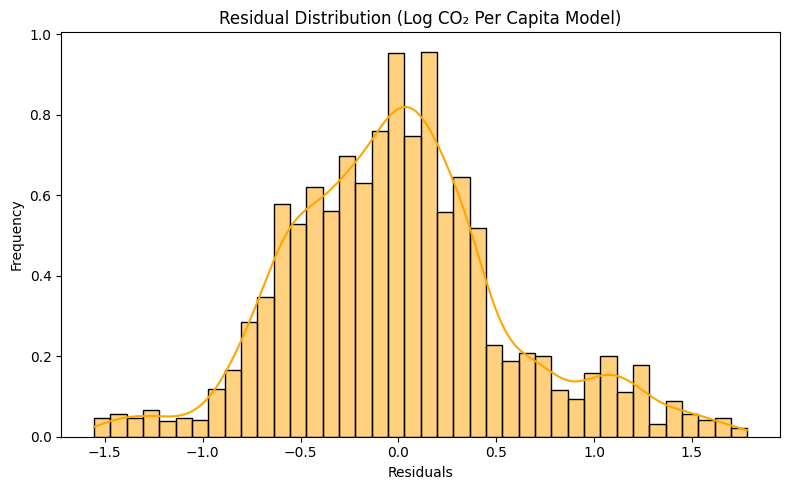

In [6]:
# Use log-transformed CO₂ per capita model for futher analysis

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd

# Prepare the data
df_log = df[['renewables_share_pct', 'log_co2_per_capita_t']].dropna()

# Fit the OLS regression model using log-transformed CO₂
log_model = smf.ols('log_co2_per_capita_t ~ renewables_share_pct', data=df_log).fit()

# Get the residuals from the model
residuals = log_model.resid

# Plot the residual distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color='orange', stat='density')
plt.title("Residual Distribution (Log CO₂ Per Capita Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Interpretation of the Residue Distribution:**

- The residuals are approximately normally distributed, centered around zero, with mild right skew and no major outliers.

- The KDE curve closely follows a bell-shaped pattern, and the distribution shows a moderate peak with smoothly tapering tails, suggesting kurtosis near 3.

- Most values fall between –1.0 and +1.0, indicating stable model behavior.

The log transformation of CO₂ per capita improves the residual distribution by better satisfying regression assumptions, particularly normality.
This enhances the reliability of statistical inference and makes the model more suitable for interpreting percentage-based changes in emissions.

<br>

### **Conclusion for H1:**

We reject the null hypothesis (H₀) and accept the alternative (H₁).
The data provides strong statistical evidence from Spearman correlation and OLS regression validates Hypothesis H1, with additional confirmation from the log-transformed model, reinforcing the robustness of the result.
The findings indicate a significant negative association between renewable energy share and CO₂ emissions per capita.

<br>

---

## **Hypothesis 2 Validation:**

**H2: Renewables Tipping Point - Above 30% renewables, CO₂ declines accelerate**

This hypothesis explores whether a structural tipping point exists in the relationship between renewable energy adoption and CO₂ emissions per capita. Inspired by EU policy targets—initially setting a 32% renewable energy goal for 2030, later raised to a binding minimum of 42.5%.  H2 investigates whether surpassing a 30% renewable energy share corresponds to an accelerated decline in emissions. The goal is to identify potential nonlinear dynamics in decarbonisation as countries transition beyond this critical threshold.


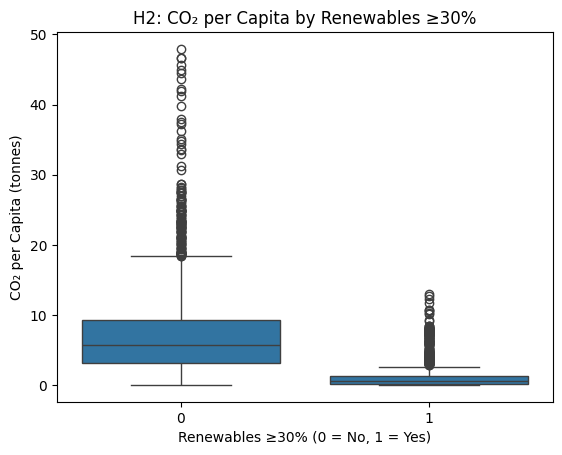

In [7]:
# Analyse H2: Distributions and Outliers:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

sns.boxplot(data=df, x='above_30_pct', y='co2_per_capita_t')
plt.title('H2: CO₂ per Capita by Renewables ≥30%')
plt.xlabel('Renewables ≥30% (0 = No, 1 = Yes)')
plt.ylabel('CO₂ per Capita (tonnes)')
plt.show()


### Boxplot Interpretation: CO₂ Emissions Drop and Stabilise Above 30% Renewables

Countries with ≥ 30% renewables show **much lower and more consistent CO₂ emissions per capita**:

- **Median emissions** fall below **2 t**, compared to **~5–6 t** in countries with < 30%.
- **Outliers and spread** are significantly reduced in the ≥ 30% group, with few emissions exceeding **3 t**.
- In contrast, the < 30% group includes many high emitters, with outliers reaching **~50 t**.

These patterns suggest that surpassing 30% renewables may mark a tipping point toward **accelerated and stabilised emissions reductions**.




### **Validating H2 Using Mann-Whitney U Test**

This analysis statistically compares **CO₂ emissions per capita** between two independent groups of countries:

- **Group 0: countries with renewables share < 30%**
- **Group 1: countries with renewables share ≥ 30%**

Given the **non-normal, skewed distribution** of CO₂ data, the **Mann-Whitney U test** is used as a non-parametric alternative to the t-test for comparing medians between two independent groups.

**Hypotheses:**

- **Null hypothesis (H₀):** No difference in CO₂ per capita between the two groups  
- **Alternative hypothesis (H₁):** Countries with ≥30% renewables have significantly lower CO₂ per capita, suggesting accelerated declines

In [8]:
from scipy.stats import mannwhitneyu

# H2: Create groups
group_above = df[df['above_30_pct'] == 1]['co2_per_capita_t'].dropna()
group_below = df[df['above_30_pct'] == 0]['co2_per_capita_t'].dropna()

# Mann-Whitney U Test
h2_stat, h2_pval = mannwhitneyu(group_above, group_below, alternative='less')  # test if above_30 has lower CO₂

h2_stat, h2_pval


(233785.0, 0.0)

**Interpretation Mann-Whitney U Test Result**

The Mann–Whitney U test resulted in a **p-value of 0.0**, indicating strong evidence against the null hypothesis. This supports the conclusion that **countries with ≥30% renewable energy share** have significantly **lower CO₂ emissions per capita** than those with less than 30%.


### **Conclusion for H2:**

We reject the null hypothesis (H₀) and accept the alternative (H₁).
The data provides strong statistical and visual evidence that countries with ≥30% renewables experience significantly lower CO₂ emissions per capita, supporting the hypothesis that emissions decline accelerates beyond this threshold.

<br>



In [ ]:
# Further explore the 30% tipping point test using population-weighted data

# ===================== 1. Prep =====================
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# Keep needed vars & drop NA
cols_needed = ['country','year','renewables_share_pct','co2_per_capita_t',
               'population','energy_intensity_mj_usd']
df_mod = df[cols_needed].dropna()

# Scale renew share to 0–1
df_mod['renew_share'] = df_mod['renewables_share_pct'] / 100

# Tipping dummy (already have above_30_pct but recompute here for clarity)
df_mod['post30'] = (df_mod['renew_share'] >= 0.30).astype(int)

# Logs for % interpretation 
df_mod['ln_co2_pc'] = np.log(df_mod['co2_per_capita_t'])
df_mod['ln_energy_intensity'] = np.log(df_mod['energy_intensity_mj_usd'])

# make sure no zero/neg pop
df_mod = df_mod[df_mod['population'] > 0]


# ===================== 2. Models =====================
formula = "ln_co2_pc ~ renew_share + post30 + post30:renew_share + ln_energy_intensity"

# Unweighted OLS
m_unw = smf.ols(formula, data=df_mod).fit(cov_type='HC3')

# Population-weighted WLS
m_w   = smf.wls(formula, data=df_mod, weights=df_mod['population']).fit(cov_type='HC3')

print(m_unw.summary())
print(m_w.summary())


# ===================== 3. Extract key effect =====================
def coef_ci(model, var):
    b = model.params[var]
    lo, hi = model.conf_int().loc[var]
    return b, lo, hi, model.pvalues[var]

for name, mod in [('Unweighted', m_unw), ('Weighted (pop)', m_w)]:
    b, lo, hi, p = coef_ci(mod, 'post30:renew_share')
    print(f"{name}: β_interaction = {b:.4f} (95% CI {lo:.4f}, {hi:.4f}), p={p:.3g}")
    
    # In log form, 1 percentage-point increase in renew_share changes CO2_pc by ~100*b percent after 30%.


                            OLS Regression Results                            
Dep. Variable:              ln_co2_pc   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     2024.
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:28:06   Log-Likelihood:                -4316.6
No. Observations:                3417   AIC:                             8643.
Df Residuals:                    3412   BIC:                             8674.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.6013    

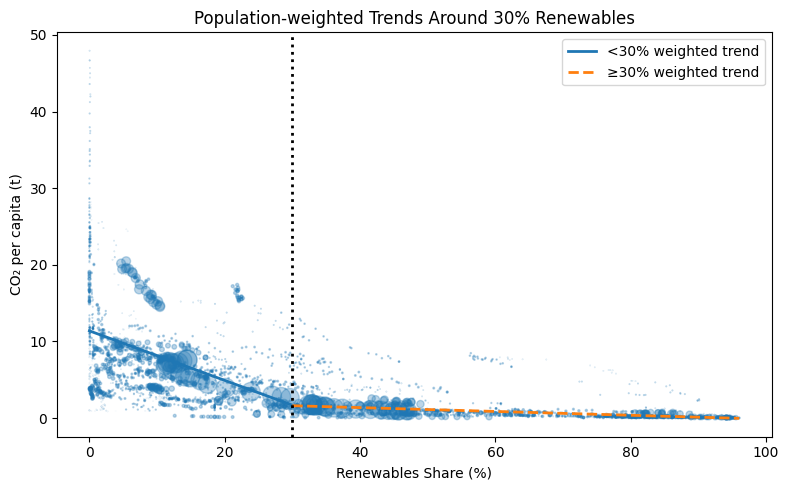

In [17]:
# Create a weighted visualization to illustrate the 30% tipping point

import matplotlib.pyplot as plt
import statsmodels.api as sm

def wls_line(x, y, w):
    X = sm.add_constant(x)
    return sm.WLS(y, X, weights=w).fit().params  # returns [const, slope]

low  = df_mod[df_mod['post30']==0]
high = df_mod[df_mod['post30']==1]

c0, s0 = wls_line(low['renew_share'],  low['co2_per_capita_t'],  low['population'])
c1, s1 = wls_line(high['renew_share'], high['co2_per_capita_t'], high['population'])

plt.figure(figsize=(8,5))

# Bubble scatter (size by population)
plt.scatter(df_mod['renew_share']*100, df_mod['co2_per_capita_t'],
            s=(df_mod['population']/df_mod['population'].max())*200, alpha=0.3)

xs1 = np.linspace(df_mod['renew_share'].min(), 0.30, 50)
plt.plot(xs1*100, c0 + s0*xs1, linewidth=2, label='<30% weighted trend')

xs2 = np.linspace(0.30, df_mod['renew_share'].max(), 50)
plt.plot(xs2*100, c1 + s1*xs2, linewidth=2, linestyle='--', label='≥30% weighted trend')

plt.axvline(30, color='black', linestyle=':', linewidth=2)
plt.xlabel('Renewables Share (%)')
plt.ylabel('CO₂ per capita (t)')
plt.title('Population-weighted Trends Around 30% Renewables')
plt.legend()
plt.tight_layout()
plt.show()


### Summary: Tipping-Point Test (≥30% Renewables) 

**Outcome:** `ln_co2_pc` (log CO₂ per capita)  
**Key predictors:** `renew_share` (0–1), `post30` (≥30% dummy), interaction `post30:renew_share`, `ln_energy_intensity` (control).  
**Models compared:**  
- **Unweighted OLS** (every country-year = 1 vote)  
- **Population‑weighted WLS** (weights = population; “average person” view)


#### 1. Core Statistics

| Model | β (post30 × renew_share) | 95% CI | p-value | R² |
|------|---------------------------|--------|---------|-----|
| Unweighted OLS | **-1.268** | [-1.798, -0.738] | 2.7e-06 | 0.717 |
| Weighted WLS (pop) | **+1.575** | [0.973, 2.177] | 2.9e-07 | 0.811 |

**Interpretation of β:**  
Because the dependent variable is logged, each **+1 percentage point** in renewables share beyond 30% changes CO₂ per capita by roughly **100 × β** percent *relative to the pre‑30% slope*.  
- Negative β → faster decline after 30%.  
- Positive β → slower (or reversed) decline after 30%.

**Result:**  
- **Unweighted:** clear **acceleration downward** in CO₂ per capita after 30%.  
- **Population‑weighted:** effect **reverses** no acceleration; the slope becomes less negative/positive.


#### 2. Visual Interpretation

**Scatter + weighted trend lines (bubble size = population):**

- Left of 30% (solid line): Steeper negative slope — CO₂ per capita drops as renewables share rises.  
- Right of 30% (dashed line): Flatter (even slightly upward) slope — for populous countries above 30%, extra renewables are **not** associated with faster declines.

The vertical dotted line at 30% marks the threshold. Bubbles clustered left of 30% show many high‑population observations there; fewer big-pop bubbles lie to the right.


#### 3. Bottom-line Conclusion

**The 30% “tipping point” exists for the *average country*, but not for the *average person*.**  
When we give population weight, the interaction flips sign: large-population countries that cross 30% do not exhibit the same accelerated CO₂ per capita decline.

---


##**Hypothesis 3 Validation:**

**H3: Energy Intensity vs CO₂ - Lower energy intensity (MJ/$) correlates with lower CO₂ per capita**

This hypothesis investigates whether countries that use energy more efficiently, measured by lower energy intensity also tend to emit less CO₂ per person. By examining this relationship, the analysis aims to assess how improvements in energy efficiency contribute to decarbonisation and climate mitigation efforts.


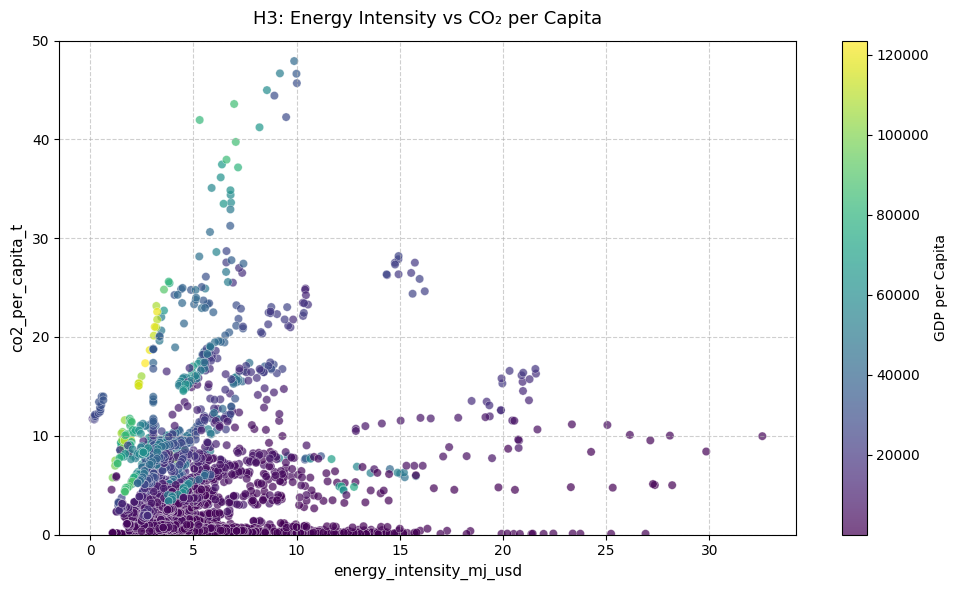

In [2]:
# Analyse H3: Distributions and Outliers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# Filter out missing values
df_plot = df[["energy_intensity_mj_usd", "co2_per_capita_t", "gdp_pc_usd"]].dropna()

# Set plot style
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data=df_plot,
    x="energy_intensity_mj_usd",
    y="co2_per_capita_t",
    c="gdp_pc_usd",
    cmap="viridis",
    alpha=0.7,
    edgecolors="w",
    linewidths=0.3
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label("GDP per Capita")

# Labels and title
plt.xlabel("energy_intensity_mj_usd", fontsize=11)
plt.ylabel("co2_per_capita_t", fontsize=11)
plt.title("H3: Energy Intensity vs CO₂ per Capita", fontsize=13, pad=12)

# Optional axis limit
plt.ylim(0, 50)
plt.grid(True, linestyle='--', alpha=0.6)

# Clean layout
plt.tight_layout()
plt.show()


### **Interpretation of Scatterplot Visual**

The relationship is non-linear and right-skewed. Most countries cluster at low energy intensity (0–10 MJ/USD) and CO₂ emissions below 20 t per capita.

- High CO₂ + Low Energy Intensity: Likely wealthy nations with efficient energy use but carbon-heavy industries
- High Energy Intensity + Moderate CO₂: Possibly less developed or inefficient economies

There's no consistent downward trend across the entire range.
Outliers appear at both ends, reflecting diverse economic and industrial profiles.

<br>


### **Validating H3 Using Pearson Correlation and Spearman Correlation**

This analysis statistically tests whether lower energy intensity is associated with lower CO₂ emissions per capita, using correlation techniques appropriate for skewed and non-linear data.

- Pearson correlation assesses linear association.
- Spearman correlation captures monotonic trends, robust to outliers and skewed distributions.


**Hypotheses:**

- **Null hypothesis (H₀):** No significant association between energy intensity and CO₂ per capita
- **Alternative hypothesis (H₁):** Lower energy intensity is significantly associated with lower CO₂ per capita


In [10]:
from scipy.stats import pearsonr, spearmanr

# Drop missing values
h3_data = df[['energy_intensity_mj_usd', 'co2_per_capita_t']].dropna()

# Calculate Pearson and Spearman correlations
pearson_corr, p_pearson = pearsonr(h3_data['energy_intensity_mj_usd'], h3_data['co2_per_capita_t'])
spearman_corr, p_spearman = spearmanr(h3_data['energy_intensity_mj_usd'], h3_data['co2_per_capita_t'])

print(f"Pearson correlation: {pearson_corr:.3f} (p = {p_pearson:.3f})")
print(f"Spearman correlation: {spearman_corr:.3f} (p = {p_spearman:.3f})")


Pearson correlation: 0.096 (p = 0.000)
Spearman correlation: -0.122 (p = 0.000)


### **H3 Correlation Results**

**Interpretation:**
Pearson (r = 0.096) indicates a very weak positive linear relationship, meaning as energy intensity increases, CO₂ per capita very slightly increases but this effect is minimal.

Spearman (ρ = -0.122) shows a very weak negative monotonic relationship, suggesting that countries with lower energy intensity tend to have lower CO₂ per capita, but again the strength is weak.

Both p-values are 0.000, meaning the correlations are statistically significant, but significance doesn’t imply strong impact.





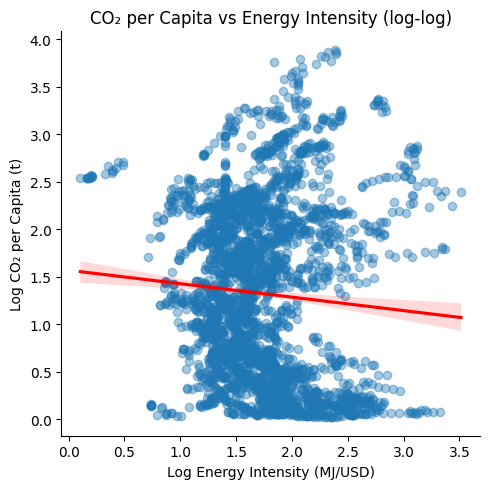

In [11]:

# Use log-log scatterplot to visualize the relationship between energy intensity and CO₂ emissions per capita
# A mathematical transformation that compresses large numbers into a smaller, more manageable scale.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter only rows where both log values exist (drop missing values)
df_corr = df[['log_energy_intensity_mj_usd', 'log_co2_per_capita_t']].dropna()

# Plot
sns.lmplot(
    data=df_corr,
    x='log_energy_intensity_mj_usd',
    y='log_co2_per_capita_t',
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.4}
)
plt.title('CO₂ per Capita vs Energy Intensity (log-log)')
plt.xlabel('Log Energy Intensity (MJ/USD)')
plt.ylabel('Log CO₂ per Capita (t)')
plt.tight_layout()
plt.show()


#### **H3 Log-Log Scatterplot Interpretation**

The red regression line shows a slight downward slope, indicating a weak negative relationship between log energy intensity and log CO₂ per capita. The wide scatter especially between **log 1.5–2.5** reflects high variability among countries with similar energy efficiency.

This aligns with the **Spearman correlation (ρ = -0.122)**, confirming a statistically significant but modest inverse relationship.


**Visual Conclusion for H3**

The plot indicates a modest association between lower energy intensity and reduced CO₂ emissions per capita. However, the weak trend and considerable data dispersion suggest that energy intensity alone is not a strong predictor, with other factors such as industry mix and income level likely playing important roles.


#### **Conclusion for H3:**

Consequently, the null hypothesis (H₀) is rejected, confirming a statistically significant but weak correlation between energy intensity and CO₂ per capita. This reinforces the idea that while energy intensity impacts emissions, it is only one of several contributing factors influencing national emission levels.

<br>
